![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face recognition
Task is to recognize a faces

### Dataset
**Aligned Face Dataset from Pinterest**

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and      aligned using dlib library.

In [1]:
import tensorflow
tensorflow.__version__

'2.3.0'

In [8]:
import pandas as pd
import numpy as np
from PIL import Image
import csv
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

#### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Change current working directory to project folder (2 mark)

In [3]:
#### Add your code here ####
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/Advanced CV/Project')

### Extract the zip file (4 marks)
- Extract Aligned Face Dataset from Pinterest.zip

In [4]:
#### Add your code here ####
!unzip "/content/drive/My Drive/Colab Notebooks/Advanced CV/Project/Copy of Aligned Face Dataset.zip" -d "/content/drive/My Drive/Colab Notebooks/Advanced CV/Project/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/My Drive/Colab Notebooks/Advanced CV/Project/pins/PINS/pins_Sophie Turner/Sophie Turner58_1668.jpg  
  inflating: /content/drive/My Drive/Colab Notebooks/Advanced CV/Project/pins/PINS/pins_Sophie Turner/Sophie Turner59_1653.jpg  
  inflating: /content/drive/My Drive/Colab Notebooks/Advanced CV/Project/pins/PINS/pins_Sophie Turner/Sophie Turner5_1638.jpg  
  inflating: /content/drive/My Drive/Colab Notebooks/Advanced CV/Project/pins/PINS/pins_Sophie Turner/Sophie Turner60_1650.jpg  
  inflating: /content/drive/My Drive/Colab Notebooks/Advanced CV/Project/pins/PINS/pins_Sophie Turner/Sophie Turner61_1725.jpg  
  inflating: /content/drive/My Drive/Colab Notebooks/Advanced CV/Project/pins/PINS/pins_Sophie Turner/Sophie Turner62_1698.jpg  
  inflating: /content/drive/My Drive/Colab Notebooks/Advanced CV/Project/pins/PINS/pins_Sophie Turner/Sophie Turner64_1722.jpg  
  inflating: /content/drive/My Drive/Colab Note

### Function to load images
- Define a function to load the images from the extracted folder and map each image with person id 


In [4]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS')

### Define function to load image
- Define a function to load image from the metadata

In [5]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

#### Load a sample image (4 marks)
- Load one image using the function "load_image"

In [6]:
#### Add your code here ####
load_image('/content/drive/My Drive/Colab Notebooks/Advanced CV/Project/pins/PINS/pins_dua lipa face/dua lipa face84.jpg')

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

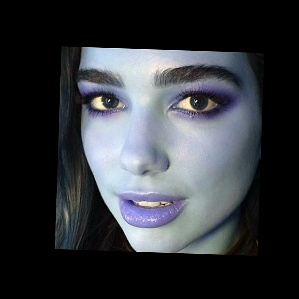

In [9]:
img_1 = load_image('/content/drive/My Drive/Colab Notebooks/Advanced CV/Project/pins/PINS/pins_dua lipa face/dua lipa face84.jpg')
cv2_imshow(img_1) 

### VGG Face model
- Here we are giving you the predefined model for VGG face

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

#### Load the model (4 marks)
- Load the model defined above
- Then load the given weight file named "vgg_face_weights.h5"

In [13]:
import keras
import keras_vggface
from keras_applications.imagenet_utils import _obtain_input_shape
from keras_vggface.vggface import VGGFace
from keras.engine import  Model
from keras_vggface.models import RESNET50, VGG16, SENET50
from keras.preprocessing import image
from keras_vggface import utils

ModuleNotFoundError: ignored

In [14]:
model = vgg_face()

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     7

In [16]:
model.load_weights("Copy of vgg_face_weights.h5")

### Get vgg_face_descriptor

In [17]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

### Generate embeddings for each image in the dataset
- Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model. 

In [18]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


### Generate embeddings for all images (10 marks)
- Write code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and store in a list with name `embeddings`

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [45]:
embeddings = np.zeros((metadata.shape[0], 2622))
print(embeddings)

for i, m in enumerate(metadata):
  print(i)
  img_path = metadata[i].image_path()
  img = load_image(img_path)
  # Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
  img = (img / 255.).astype(np.float32)
  img = cv2.resize(img, dsize = (224,224))
  print(img.shape)
  embeddings[i] = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
  print(embeddings[i])

Streaming output truncated to the last 5000 lines.
3787
(224, 224, 3)
[-0.00087841 -0.00532748  0.00768725 ... -0.03674892  0.00558527
  0.0205309 ]
3788
(224, 224, 3)
[-0.0182493  -0.02400998 -0.00608086 ... -0.04575331 -0.00041047
  0.0169848 ]
3789
(224, 224, 3)
[ 0.00479952 -0.00303047  0.00830427 ... -0.03098116  0.0004331
  0.02904841]
3790
(224, 224, 3)
[-0.00494438 -0.01828879  0.0047842  ... -0.02586505  0.00442694
  0.01477074]
3791
(224, 224, 3)
[-0.00570823 -0.01331835  0.00783991 ... -0.02945504  0.00340778
  0.02251609]
3792
(224, 224, 3)
[0.00472223 0.00232646 0.00513781 ... 0.00199471 0.00474425 0.01327436]
3793
(224, 224, 3)
[-0.00194352  0.00127947  0.00503937 ... -0.02015432  0.00515509
  0.01222859]
3794
(224, 224, 3)
[ 1.48011455e-02 -7.93471991e-05 -3.15167662e-03 ... -6.85369968e-03
  3.50839295e-03  3.84526048e-03]
3795
(224, 224, 3)
[ 0.01711126  0.00786007  0.01583237 ... -0.01526926  0.006622
 -0.0036627 ]
3796
(224, 224, 3)
[ 0.00835848 -0.0038421   0.007650

KeyboardInterrupt: ignored

### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [20]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

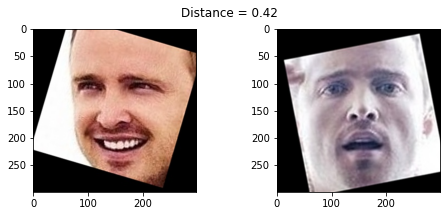

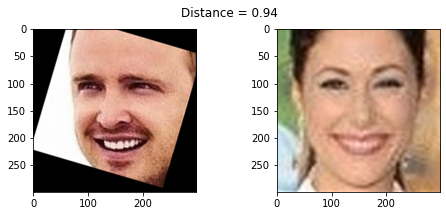

In [21]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)

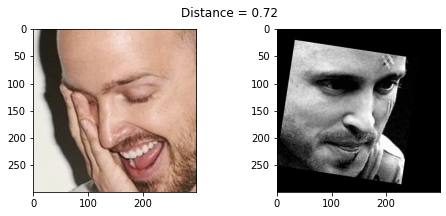

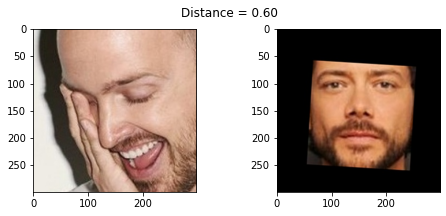

In [22]:
show_pair(30,31)
show_pair(30,100)

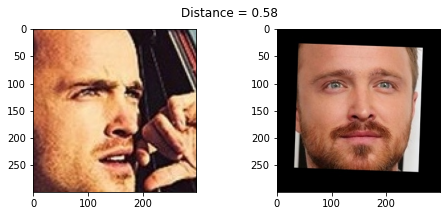

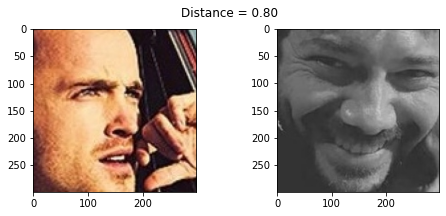

In [23]:
show_pair(70,72)
show_pair(70,115)

### Create train and test sets (10 marks)
- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [25]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0     #every 9th example goes in test data and rest go in train data
test_idx = np.arange(metadata.shape[0]) % 9 == 0

# one half as train examples of 10 identities
X_train = embeddings[train_idx]
# another half as test examples of 10 identities
X_test = embeddings[test_idx]
#### Add your code here ####

targets = np.array([m.name for m in metadata])
#train labels
y_train = targets[train_idx]
y_test = targets[test_idx]


In [28]:
print(X_train)
print(y_train)

[[ 0.04952267 -0.00037868 -0.00070935 ...  0.01278188 -0.0006461
   0.00865275]
 [ 0.04397821 -0.00302586  0.00051129 ... -0.00943851 -0.00273483
   0.01239773]
 [ 0.03222225  0.01402866 -0.00196664 ...  0.00119942  0.0123876
   0.01424086]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
['pins_Aaron Paul' 'pins_Aaron Paul' 'pins_Aaron Paul' ... 'pins_zendaya'
 'pins_zendaya' 'pins_zendaya']


In [29]:
print(X_test)
print(y_test)

[[ 0.03387297 -0.00404642 -0.0063194  ... -0.00015425  0.00216459
   0.003674  ]
 [ 0.02836727 -0.00789152 -0.00285909 ... -0.00665873  0.00208847
   0.00304253]
 [ 0.01292649 -0.00900512  0.00703634 ... -0.01452406 -0.00115604
   0.00338774]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
['pins_Aaron Paul' 'pins_Aaron Paul' 'pins_Aaron Paul' ... 'pins_zendaya'
 'pins_zendaya' 'pins_zendaya']


### Encode the Labels (6 marks)
- Encode the targets
- Use LabelEncoder

In [30]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y_train = labelencoder.fit_transform(y_train)

In [32]:
print(y_train)
print(y_train.shape)

[ 0  0  0 ... 99 99 99]
(9573,)


In [33]:
y_test = labelencoder.transform(y_test)

In [34]:
print(y_test)
print(y_test.shape)

[ 0  0  0 ... 99 99 99]
(1197,)


### Standardize the feature values (6 marks)
- Scale the features using StandardScaler

In [36]:
# Standarize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#transform training data
X_train_scaled = scaler.fit_transform(X_train)
print(X_train_scaled)

[[ 5.81426908 -0.12690285 -0.28001623 ...  1.95369248 -0.30802424
   0.6370209 ]
 [ 5.10959727 -0.58723841 -0.0621501  ... -0.59529542 -0.67014945
   1.09809511]
 [ 3.61547647  2.37848864 -0.50442409 ...  0.62502403  1.95164347
   1.32501822]
 ...
 [-0.47980151 -0.06105082 -0.15340796 ...  0.48743341 -0.19600829
  -0.42828936]
 [-0.47980151 -0.06105082 -0.15340796 ...  0.48743341 -0.19600829
  -0.42828936]
 [-0.47980151 -0.06105082 -0.15340796 ...  0.48743341 -0.19600829
  -0.42828936]]


In [37]:
#transform test data
X_test_scaled = scaler.fit_transform(X_test)
print(X_test_scaled)

[[ 3.83525901 -0.75395394 -1.30458693 ...  0.46216364  0.22091106
   0.0487067 ]
 [ 3.13541163 -1.44051208 -0.70219926 ... -0.28794405  0.20778155
  -0.03042333]
 [ 1.17268292 -1.63935036  1.02044307 ... -1.19498716 -0.35182713
   0.01283458]
 ...
 [-0.47044521 -0.03144806 -0.20447599 ...  0.47995153 -0.15243502
  -0.41168255]
 [-0.47044521 -0.03144806 -0.20447599 ...  0.47995153 -0.15243502
  -0.41168255]
 [-0.47044521 -0.03144806 -0.20447599 ...  0.47995153 -0.15243502
  -0.41168255]]


### Reduce dimensions using PCA (6 marks)
- Reduce feature dimensions using Principal Component Analysis
- Set the parameter n_components=128

In [38]:
from sklearn.decomposition import PCA

#### Add your code here ####
pca = PCA(n_components=128)

X_train_principalComponents = pd.DataFrame(pca.fit_transform(X_train_scaled))
X_train = pd.DataFrame(X_train_scaled)

print(type(X_train_principalComponents))
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [39]:
print(X_train_principalComponents[1])
X_train_concat = pd.concat([X_train_principalComponents, X_train], axis = 1)

0      -29.055627
1      -13.711021
2      -29.468637
3      -19.042357
4      -21.457103
          ...    
9568    -0.210238
9569    -0.210238
9570    -0.210238
9571    -0.210238
9572    -0.210238
Name: 1, Length: 9573, dtype: float64


In [40]:
X_test_principalComponents = pd.DataFrame(pca.transform(X_test_scaled))
X_test = pd.DataFrame(X_test_scaled)

print(type(X_test_principalComponents))
print(type(X_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [41]:
print(X_test_principalComponents[1])
X_test_concat = pd.concat([X_test_principalComponents, X_test], axis = 1)

0      -16.081082
1      -15.467991
2      -16.123490
3      -13.930779
4      -16.083133
          ...    
1192    -0.087897
1193    -0.087897
1194    -0.087897
1195    -0.087897
1196    -0.087897
Name: 1, Length: 1197, dtype: float64


### Build a Classifier (6 marks)
- Use SVM Classifier to predict the person in the given image
- Fit the classifier and print the score

In [42]:
from sklearn import svm
from sklearn.svm import SVC

#### Add your code here ####
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train_concat, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test_concat)

In [43]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_pred, y_test) * 100)

for i, m in enumerate(metadata):
  if (y_pred[i] == y_test[i]):
    print("Correct Prediction - " + str(metadata[i]) + "-" + str(y_pred[i]) + "-" + str(y_test[i]))
  else:
    print("Wrong Prediction - " + str(metadata[i]) + "-" + str(y_pred[i]) + "-" + str(y_test[i]))

29.239766081871345
Correct Prediction - PINS/pins_Aaron Paul/Aaron Paul165_254.jpg-0-0
Correct Prediction - PINS/pins_Aaron Paul/Aaron Paul155_220.jpg-0-0
Correct Prediction - PINS/pins_Aaron Paul/Aaron Paul113_228.jpg-0-0
Correct Prediction - PINS/pins_Aaron Paul/Aaron Paul158_277.jpg-0-0
Correct Prediction - PINS/pins_Aaron Paul/Aaron Paul103_217.jpg-0-0
Correct Prediction - PINS/pins_Aaron Paul/Aaron Paul145_256.jpg-0-0
Correct Prediction - PINS/pins_Aaron Paul/Aaron Paul124_221.jpg-0-0
Correct Prediction - PINS/pins_Aaron Paul/Aaron Paul120_290.jpg-0-0
Correct Prediction - PINS/pins_Aaron Paul/Aaron Paul101_248.jpg-0-0
Correct Prediction - PINS/pins_Aaron Paul/Aaron Paul130_215.jpg-0-0
Correct Prediction - PINS/pins_Aaron Paul/Aaron Paul168_268.jpg-1-1
Correct Prediction - PINS/pins_Aaron Paul/Aaron Paul129_260.jpg-1-1
Correct Prediction - PINS/pins_Aaron Paul/Aaron Paul164_276.jpg-1-1
Correct Prediction - PINS/pins_Aaron Paul/Aaron Paul140_243.jpg-1-1
Correct Prediction - PINS/pin

IndexError: ignored

### Test results (2 mark)
- Take 10th image from test set and plot the image
- Report to which person(folder name in dataset) the image belongs to

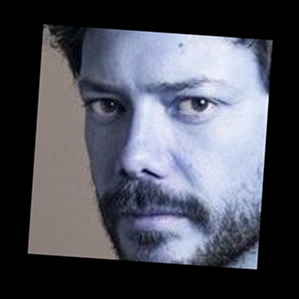

pins_Alvaro Morte


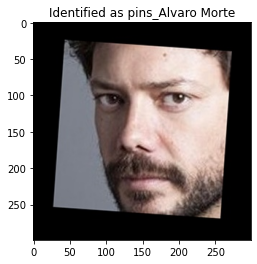

In [44]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 10
example_image = load_image(metadata[test_idx][example_idx].image_path())
cv2_imshow(example_image) 

example_identity = labelencoder.inverse_transform(y_pred)[example_idx]
print(example_identity)

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');